## Matplotlib

**`matplotlib`** paketi Python'un en yaygın kullanılan görselleştirme aracıdır. Sayısal olarak verimli diziler ve vektörleştirilmiş işlevler için büyük ölçüde NumPy kütüphanesine dayanır.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

## Basic plotting

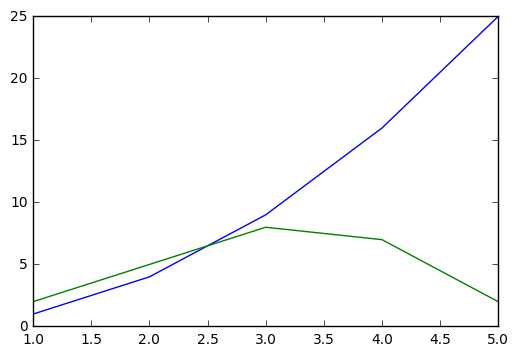

In [11]:
x = [1,2,3,4,5]
y1 = [1,4,9,16,25]
y2 = [2, 5, 8, 7, 2]
plt.plot(x,y1, x, y2)

## Function plotting

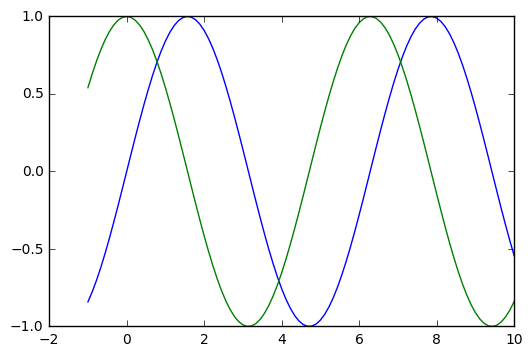

In [13]:
x = np.linspace(-1,10,100)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x,y1,x,y2)

Başlık, eksen etiketleri, gösterge, ızgara ekleyin.

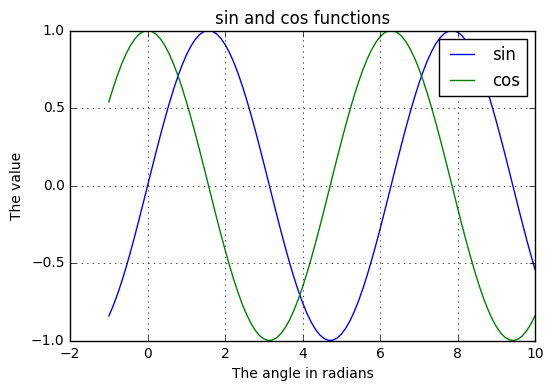

In [14]:
plt.plot(x,y1,x,y2)
plt.title("sin and cos functions")
plt.xlabel("The angle in radians")
plt.ylabel("The value")
plt.grid()
plt.legend(["sin","cos"])

## Visualize the random walk

Bir parçacığın başlangıç noktasında başladığını, rastgele bir yön seçtiğini ve bu yönde 1 uzunluğunda bir adım attığını varsayalım. Birçok rastgele adımdan sonra yolu nasıl görünecektir?

In [ ]:
import random

**`random.choice`** fonksiyonu bir iterable alır ve iterable'ın rastgele seçilmiş bir elemanını döndürür. Bunu her eksende rastgele bir yön seçmek için kullanacağız.

In [41]:
steps = 10**6
xlist = [0]
ylist = [0]
for i in range(steps):
    # at each step, choose a random increment direction for x and y
    incr = random.choice(((0,1),(0,-1),(1,0),(-1,0)))
    # add to the last position to get the new position
    curx = xlist[-1]
    cury = ylist[-1]
    newx = curx + incr[0]
    newy = cury + incr[1]
    xlist.append(newx)
    ylist.append(newy)

In [ ]:
plt.plot(xlist, ylist, "r")

## Data visualization

Basit bir örnek olarak, ülkeleri ve nüfuslarını listeleyen bir dosya düşünün. Kaynak:[CIA World Factbook](https://www.cia.gov/library/publications/the-world-factbook/rankorder/rawdata_2119.txt)

Dosyanın ilk birkaç satırı şöyledir:
```
1      China                                              1,373,541,278                                     
2      India                                              1,266,883,598                                     
3      European Union                                     513,949,445                                       
4      United States                                      323,995,528                                       
5      Indonesia                                          258,316,051                                       
6      Brazil                                             205,823,665                                       
```

İlk olarak, bu verileri biri ülke adı ve diğeri nüfus için olmak üzere iki diziye ayrıştırın.

In [3]:
fin=open("populations.txt")
line=fin.readline()
fin.close()

In [4]:
line.split()

['1', 'China', '1,373,541,278']

Liste kavramalarını kullanarak bir liste listesini okuyun.

In [6]:
fin=open("populations.txt")
rawdata = [line.split() for line in fin]
fin.close()

Yukarıdaki liste anlayışının aşağıdaki koda eşdeğer olduğunu unutmayın:
```
rawdata = []
for line in fin:
    rawdata.append( line.split() )
```

In [9]:
rawdata[:3]

[['1', 'China', '1,373,541,278'],
 ['2', 'India', '1,266,883,598'],
 ['3', 'European', 'Union', '513,949,445']]

İşlemimizde küçük bir hata var: Ülke adlarını da boşluk karakterlerinde bölüyor. Önemli değil; tek ihtiyacımız olan biraz dikkat.

Nüfus dizelerini tek bir listede toplayın:

In [10]:
rawpop = [e[-1] for e in rawdata]

`e[2]` kullanmadık, çünkü ülke adı bölünmüşse, `e[2]` nüfus değildir. Ancak, nüfus her zaman son öğedir, bu nedenle `e[-1]` kullanırız.

Ülke adlarını `[1:-1]` dilimlemesini kullanarak toplayın ve boşluk ile birleştirin.

In [11]:
rawdata[2][1:-1]

['European', 'Union']

In [12]:
" ".join(rawdata[2][1:-1])

'European Union'

In [13]:
cntrynames = [" ".join(e[1:-1]) for e in rawdata]

In [14]:
cntrynames[:10]

['China',
 'India',
 'European Union',
 'United States',
 'Indonesia',
 'Brazil',
 'Pakistan',
 'Nigeria',
 'Bangladesh',
 'Russia']

İyi görünüyor. Şimdi nüfusları sayılara dönüştürün. Sayılar virgül içerdiği için doğrudan `int` ile eşleyemeyiz.

In [15]:
int(rawpop[0])

ValueError: invalid literal for int() with base 10: '1,373,541,278'

We first use the `replace` method to replace commas with the empty string.

In [17]:
rawpop[0].replace("," , "")

'1373541278'

Ve `int` ile sararak bir tamsayıya dönüştürün.

In [18]:
int(rawpop[0].replace("," , ""))

1373541278

Şimdi aynı işlemi tüm liste için yapın.

In [19]:
pop = [int(e.replace("," , "")) for e in rawpop]

In [20]:
pop[:5]

[1373541278, 1266883598, 513949445, 323995528, 258316051]

Şimdi çizim yapmaya hazırız. Karmaşayı önlemek için sadece en kalabalık ilk 20 ülkeyi çizin.

<Container object of 20 artists>

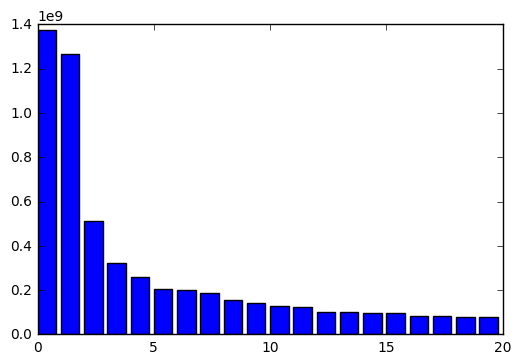

In [23]:
plt.bar(range(20),pop[:20])

Ülke adlarını tik etiketleri, başlık ve eksen etiketleri olarak ekleyelim.

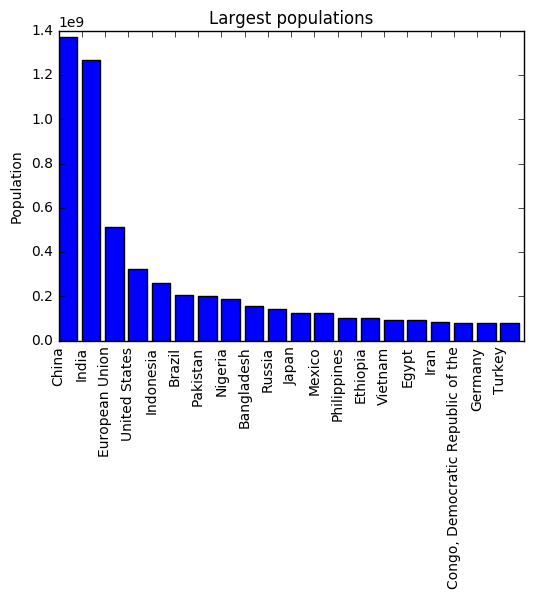

In [29]:
plt.bar(range(20),pop[:20])
plt.xticks(range(20), cntrynames[:20], rotation="vertical")
plt.title("Largest populations")
plt.ylabel("Population");